In [1]:
import scvi
import numpy as np
import scanpy as sc
import pandas as pd
import scipy.io as sio

Global seed set to 0
OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [2]:
# import dataset first 

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.8.2 anndata==0.7.8 umap==0.5.2 numpy==1.21.4 scipy==1.7.2 pandas==1.3.4 scikit-learn==1.0.1 statsmodels==0.13.1 pynndescent==0.5.5


In [3]:
results_file = 'scvi/pal_pre-labeled_scvi.h5ad'  # the file that will store the analysis results


In [11]:
adata = sc.read_h5ad('pal_labeled_for_dlg.h5ad')

In [5]:
a = sc.read_mtx("counts-for-scvi/counts_matrix.mtx").transpose()

In [22]:
adata.layers['scaled'] = adata.X.copy()

In [15]:
a.obs_names = pd.read_csv("counts-for-scvi/counts_matrix_colnames.csv")['x']

In [16]:
a.var_names = pd.read_csv("counts-for-scvi/counts_matrix_rownames.csv")["x"]

In [60]:
a.obs = adata.obs

In [64]:
a.layers['counts'] = a.X.copy()

In [65]:
#scvi.model.SCVI.setup_anndata(a, layer="counts", batch_key = "group")

INFO     Using batches from adata.obs["group"]                                               
INFO     No label_key inputted, assuming all cells have same label                           
INFO     Using data from adata.layers["counts"]                                              
INFO     Successfully registered anndata object containing 171215 cells, 16469 vars, 26      
         batches, 1 labels, and 0 proteins. Also registered 0 extra categorical covariates   
         and 0 extra continuous covariates.                                                  
INFO     Please do not further modify adata until model is trained.                          


In [68]:
sc.pp.highly_variable_genes(
    a,
    n_top_genes=5000,
    subset=True,
    layer="counts",
    flavor="seurat_v3",
    batch_key="group"
)

If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
--> added
    'highly_variable', boolean vector (adata.var)
    'highly_variable_rank', float vector (adata.var)
    'means', float vector (adata.var)
    'variances', float vector (adata.var)
    'variances_norm', float vector (adata.var)


In [ ]:
#scvi.model.SCVI.setup_anndata(
#    adata,
#    layer="counts",
#    categorical_covariate_keys=["group"],
#    #continuous_covariate_keys=["percent_mito", "percent_ribo"]
#)
#INFO  

In [70]:
scvi.model.SCVI.setup_anndata(a, layer="counts", batch_key = "group")

INFO     Using batches from adata.obs["group"]                                               
INFO     No label_key inputted, assuming all cells have same label                           
INFO     Using data from adata.layers["counts"]                                              
INFO     Successfully registered anndata object containing 171215 cells, 5000 vars, 26       
         batches, 1 labels, and 0 proteins. Also registered 0 extra categorical covariates   
         and 0 extra continuous covariates.                                                  
INFO     Please do not further modify adata until model is trained.                          


In [72]:
model = scvi.model.SCVI(a)


In [73]:
model

SCVI Model with the following params: 
n_hidden: 128, n_latent: 10, n_layers: 1, dropout_rate: 0.1, dispersion: gene, 
gene_likelihood: zinb, latent_distribution: normal
Training status: Not Trained

To print summary of associated AnnData, use: scvi.data.view_anndata_setup(model.adata)

In [74]:
model.train()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores


Epoch 47/47: 100%|████| 47/47 [1:07:06<00:00, 85.68s/it, loss=1.59e+03, v_num=1]


In [75]:
latent = model.get_latent_representation()


In [76]:
latent

array([[ 0.06471908, -0.9580354 ,  0.5473099 , ..., -1.4915788 ,
         0.17664948,  0.47494805],
       [ 0.37470877,  0.534244  , -0.6604488 , ..., -1.1762666 ,
         0.05300015,  0.69023293],
       [-0.35848984,  0.9259501 , -0.7749954 , ..., -1.7350295 ,
        -0.10727851,  0.54148865],
       ...,
       [ 0.1705226 , -0.9916147 , -0.20908578, ...,  1.6600542 ,
         1.1947097 , -0.8874328 ],
       [-0.60774696, -0.9597235 ,  0.46032444, ...,  1.6863263 ,
         1.3058609 ,  0.43036002],
       [ 0.16794634, -0.14958504, -1.9141413 , ...,  0.6250866 ,
        -1.1786704 , -0.52829826]], dtype=float32)

In [78]:
a.obsm["X_scVI"] = latent


In [79]:
a

AnnData object with n_obs × n_vars = 171215 × 5000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'immune_label', 'immune_label_fine', 'group', '_scvi_batch', '_scvi_labels'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: '_scvi', 'hvg'
    obsm: 'X_scVI'
    layers: 'counts'

In [80]:
a.write("given_labels_with_scvi.h5ad")

/Users/tgreen/opt/anaconda3/envs/scvi/lib/python3.7/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'orig.ident' as categorical
/Users/tgreen/opt/anaconda3/envs/scvi/lib/python3.7/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'immune_label' as categorical
/Users/tgreen/opt/anaconda3/envs/scvi/lib/python3.7/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and w

In [81]:
np.savetxt("given_labels_with_scvi_coords.txt",a.obsm['X_scVI'])

In [82]:
pd.DataFrame(data = a.obsm["X_scVI"], index = a.obs_names).to_csv("scvi_coords.csv")

In [83]:
sc.pp.neighbors(a, use_rep="X_scVI")
sc.tl.umap(a, min_dist=0.3)

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:23)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:01:52)


In [9]:
scvi_out = pd.read_csv("scvi-output/scvi_coords.csv")


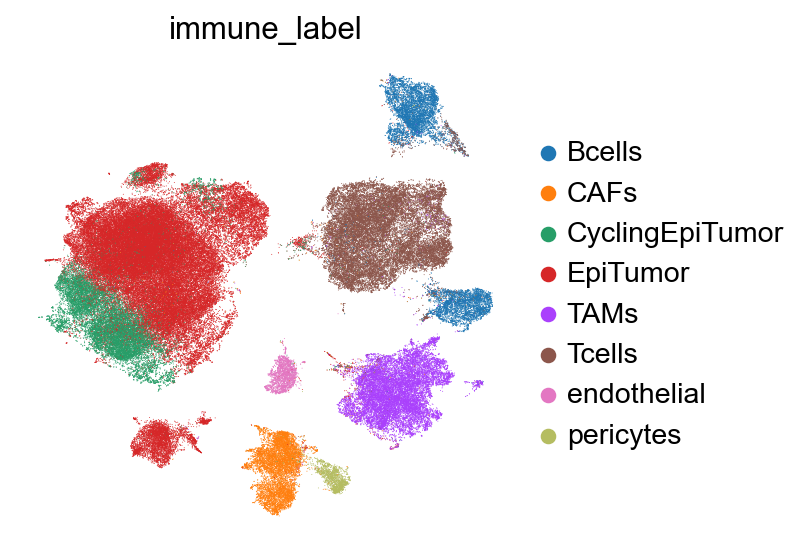

In [85]:
sc.pl.umap(
    a,
    color=["immune_label"],
    frameon=False,
)


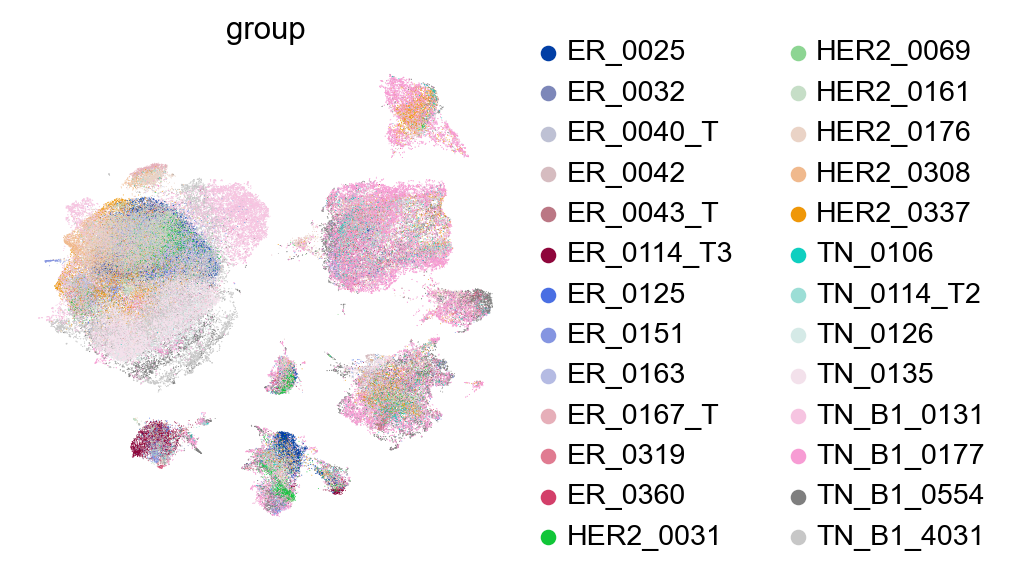

In [87]:
sc.pl.umap(
    a,
    color="group",
    ncols=2,
    frameon=False,
)

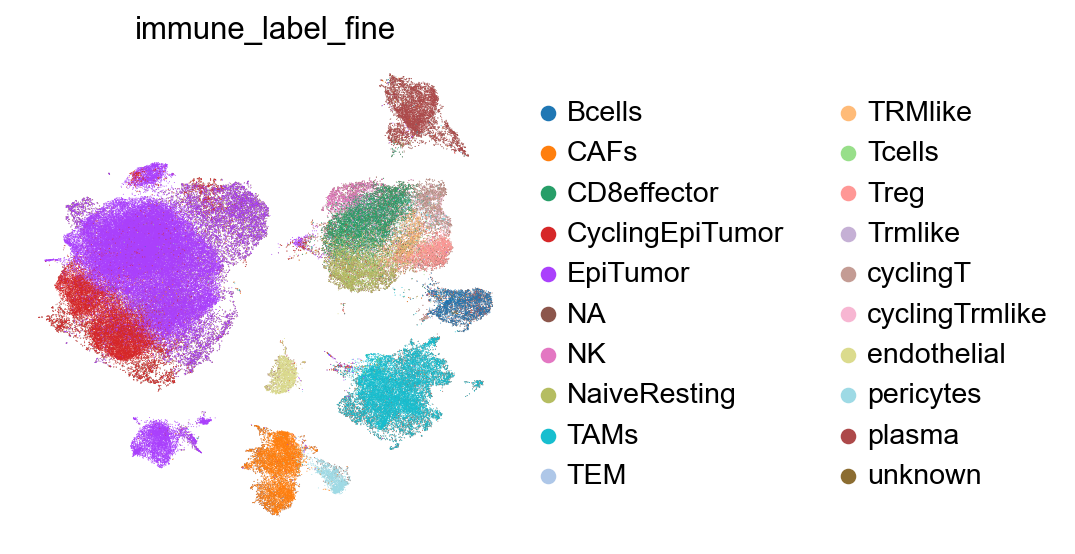

In [88]:
sc.pl.umap(
    a,
    color="immune_label_fine",
    ncols=2,
    frameon=False,
)

In [ ]:
sc.pl.umap(
    a,
    color="group",
    ncols=2,
    frameon=False,
)

NameError: name 'a' is not defined